<a href="https://colab.research.google.com/github/jcvasquezbetancur/DS-colab/blob/master/Teoria_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qué es Matplotlib, Es obsoleto?

Modulo de graficación originado hacia 2002, de arquetipo Matlab.

Puede ser algo low-level pero es flexible y sigue evolucionando 

(Ejm: hacer  uso de styles-sheet y graficos animados)

Algunos modulos como pandas mismo y seaborn, construyen graficos 
con comandos simples, basados en matplotlib, aunque mas restrictivos.

ALETERNATIVAS: 
SEABORN (util para interaccion con pandas)
PLOTLY. Interactivo y web-based(html,dash)
Originalmente es un modulo Javascript 
pero se crearon API en python y R para su uso en DataScience.


#[ANATOMIA OBJETOS de PYPLOT](https://matplotlib.org/3.1.1/_images/anatomy.png)
![texto alternativo](https://matplotlib.org/3.1.1/_images/anatomy.png)

#EJEMPLO: Gráfico de puntos/lineas simples 2D

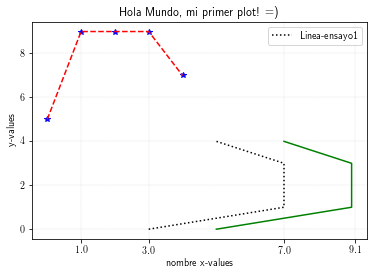

In [0]:
#graficar unos puntos, sueltos o con lineas.

#comandos opcionales de preparacion
# primero pone la grafica en la celda del notebook
%matplotlib inline   

#---INICIO
import  matplotlib.pyplot as plt
import  random


x= [i for i in range(5)] # [0,1,2,3,4]
y= [random.randint(5,10) for i in range(5)] #comprension
z=[n-2 for n in y] # otro  vector de valores para evitar solapamiento

#plt.plot(x,y,string fmt) FMT= Formato abreviado de estilo

plt.plot(x,y,'b*') # blue and stars , estrellas azules
plt.plot(y,x, 'g-') # green with a line, linea continua verde
plt.plot(x,y,'r--') # red AND  dashline,  linea dash roja
 
#equivalentemente al fmt el modo extenso es
plt.plot(z,x, linestyle='dotted',c='black',label='Linea-ensayo1') #k is  black,

#'-', '--', '-.', ':'   EQUIVALENTEMENTE SON 
#'solid', 'dashed', 'dashdot', 'dotted'
#SIN-LINEA SON#  'None'  EQUIVALE   ' ' EQUIVALE  ''

#Mostrar los labels de las graficas (solo labels que fueron definidos)
plt.legend()

#poner titulo al la grafica
plt.title("Hola Mundo, mi primer plot! =)")

#Poner titulo a los ejes...
plt.xlabel('nombre x-values')
plt.ylabel('y-values')

#Poner guias/ticks a ejes (cambia los fijados automaticamente)
plt.xticks([1,3,7,9.1]) #por defecto fueron [0,2,4....]

#adds major gridlines
plt.grid(color='grey', linestyle='dotted', linewidth=0.25, alpha=0.85)
#alpha controla la transparencia de la linea de la rejilla

#Guardar  la grafica
#En notebooks jupyter o colab, el savefig debe hacerse antes del show().
plt.savefig('first-plot.png') #  guarda en PNG y queda en su carpeta de entorno

#Mostrar la grafica
plt.show() # show the plots



# ACTIVAR LATEX....en COLAB

In [0]:
#permitir uso de latex en el texto de las graficas
! sudo apt install cm-super
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
import matplotlib
matplotlib.rcParams['text.usetex'] = True


Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2017.20180305-2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


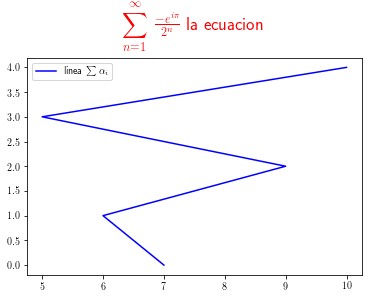

In [0]:
#####repitamos la grafica anterior
#para usar latex. r'string  $math symbols $'
import  random
x= [i for i in range(5)] # [0,1,2,3,4]
y= [random.randint(5,10) for i in range(5)] #comprension

plt.plot(y,x, linestyle='solid',c='b',label=r'linea $\sum \alpha_i$')
plt.legend() #muestra la leyenda
plt.title(r'a ecuacion es $\displaystyle \sum_{n=1}^\infty$  \
           $\frac{-e^{i\pi}}{2^n}$ l', fontsize=18, color='red')

#En notebooks jupyter o colab, el savefig debe hacerse antes del show().
# Note la opcion bboxagranda el recuador para q al guardar el titulo no salga mutilado 
plt.savefig('plot-latex.pdf',bbox_inches='tight')  #guarda automaticamente PDF.  
plt.savefig('plot-latex.png',bbox_inches='tight')  #guarda automaticamente PNG.
plt.show()


#LOS OBJETOSAXIS(ax) Y FIGURE(fig)

cada grafica tiene asociados dos objetos basicos.
Las propiedades, colores, ubicacion,ejes y todas
las caracteristicas de la grafica son metodos de
esos objetos. ejemplo

//fig , ax = plt.subplots()

//adds major gridlines

//ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

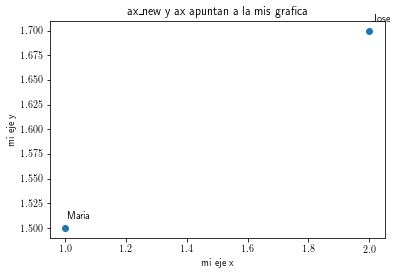

In [0]:
#Asignacion de fig y ax
fig, ax = plt.subplots()
#unos datos
x=[1,2]
y=[1.5,1.7]
tags=['Maria', 'Jose']
##ejemplo usando scatter y no plot.
ax.scatter(x,y) #scatter grafica  nubes de puntos

#Anotar es posible en un loop si son muchos puntos
for name,i,j in zip(tags,x,y): #zip empareja los elementos de x y y
  plt.annotate(name, (i+0.01,j+0.01)) # annotate(marcador,ubicacion)


#asi vemos ax AXIS  y fig FIGURE
plt.xlabel('mi eje x')
#equivale al comando sobre ax
ax.set_ylabel('mi eje y') #plt.ylabel

#Otro ejemplo 
plt.savefig('figura2v1.png')
#equivale 
fig.savefig('figura2v2.png')

# SI olvidamos llamar ax y fig al inicio, podemos llamarlos
ax_new = plt.gca()# get current axes
fig_new = plt.gcf()  # get current figure

ax_new.set_title( r'ax\_new y ax apuntan a la mis grafica')
fig_new.show()

#EJEMPLO : Múltiples gráficas


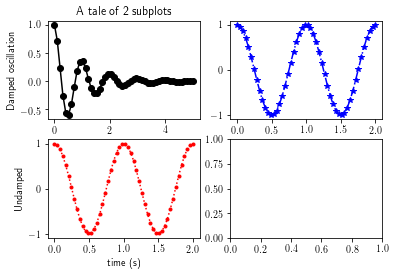

In [0]:
#---primero preparemos unos puntos/datos con numpy
import numpy as np
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
#listo
#---INICIO------GRAFICAS-------------------------

# Creamos tabla con 4 graficas, 2x2
# fig, es unica para la hoja
#pero ax es un arreglo de 4 objetos Axes 
fig, ax = plt.subplots(2,2)  # ax[0],ax[1],ax[2],ax[3]


#plt.subplot(fila, columna, indice ) envia a plt a un AXIS especifico
plt.subplot(2, 2, 1) ### esto hace que plt apunte a AXES -> ax[0]
plt.plot(x1, y1, 'ko-') # equivalente ax[0].plot(....)
plt.title('A tale of 2 subplots') #equivalente ax[0].set_title()
plt.ylabel('Damped oscillation')  # equivale a ax[0].set_ylabel()

plt.subplot(2, 2, 2)  ####ahora plt apunta a AXES ->ax[1]
plt.plot(x2, y2, 'b*-.')

plt.subplot(2, 2, 3)  ####ahora plt apunta a AXES ->ax[2]
plt.plot(x2, y2, 'r.:')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()  # Pregunta:por que muestra todas y no solo la 3ra?
#Respuesta:  porque show() es un metodo de fig y fig solo hay un OBJETO.

#EJEMPLO grafica 3D

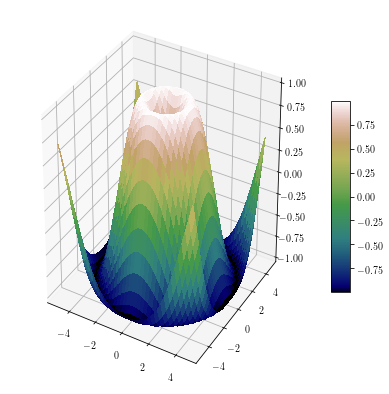

In [0]:
from matplotlib import cm  ## mapa de colores
from mpl_toolkits.mplot3d import axes3d

#otra forma de asignarlos objetos de fig y ax
myfig = plt.figure(figsize=(15,7))
myax = myfig.add_subplot(1, 2, 1, projection='3d')

#numpy generalos datos
import numpy as np
X = np.arange(-5, 5, 0.25) #lista de valoresx
Y = np.arange(-5, 5, 0.25) # lista de valores y
X, Y = np.meshgrid(X, Y) #producto cartesiano de x con y, la rejilla
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = myax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gist_earth,
                       linewidth=0, antialiased=False)
myax.set_zlim(-1.01, 1.01)
myfig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()



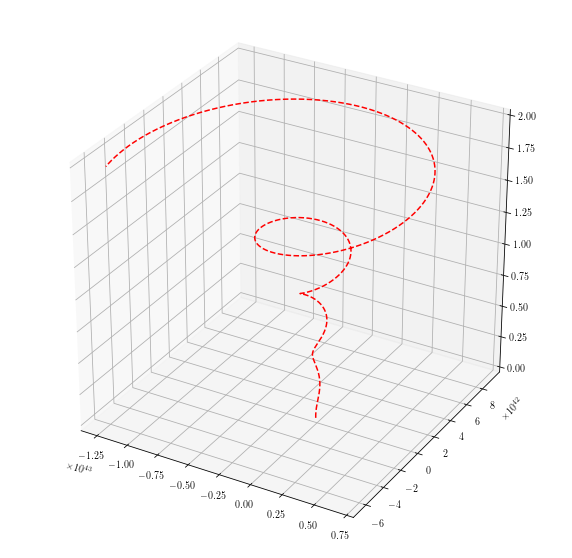

In [0]:
from mpl_toolkits.mplot3d import Axes3D
#Para añadir la proj --> 3d
#Y para finalizar un 3D sencillo
fig1 = plt.figure("Una espiral",figsize=(10,10))
ax1 = fig1.add_subplot(111, projection='3d')

a=0.5
b=0.20
th=np.linspace(475, 500, 10000)
x=a*np.exp(b*th)*np.cos(th)
y=a*np.exp(b*th)*np.sin(th)
z = np.linspace(0,2, len(th))
ax1.plot(x, y, z,linestyle='--',color='r')

plt.show()

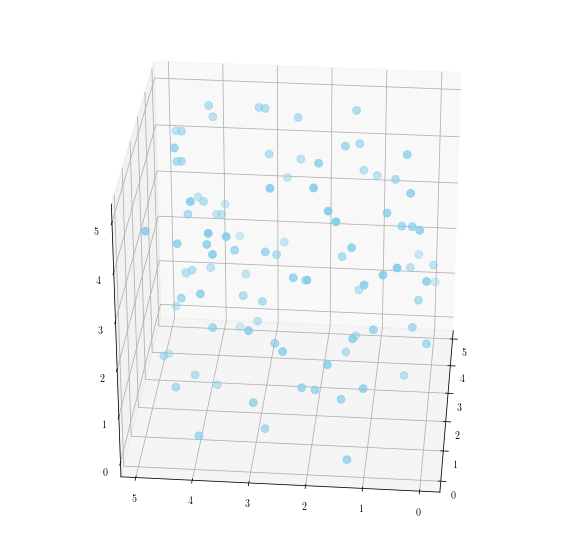

In [0]:
x=np.random.rand(100)*5
y=np.random.rand(100)*5
z=np.random.rand(100)*5

#Y para finalizar un 3D sencillo
fig = plt.figure("Conjunto sencillo de puntos",figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 185)
ax.scatter(x, y, z, c='skyblue', s=60)
plt.show()


#EJEMPLO anotaciones en una gráfica

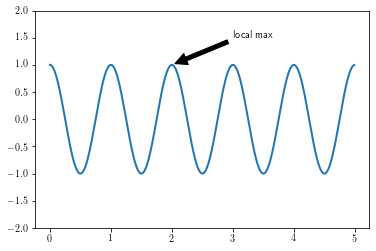

In [0]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

#EJEMPLO grafica en coordenadas Polares

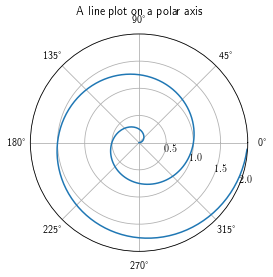

In [0]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

#EJEMPLO piecharts o tortas

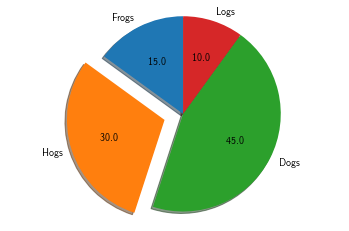

In [0]:
nombres = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [45, 90, 135, 30] #notese que los valores suman 300,
explodelist = (0, 0.2, 0, 0)  # para hace hogs resaltada del pie.

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explodelist, labels=nombres, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # para que sea un circulo 

plt.show()

#EJEMPLO histograma

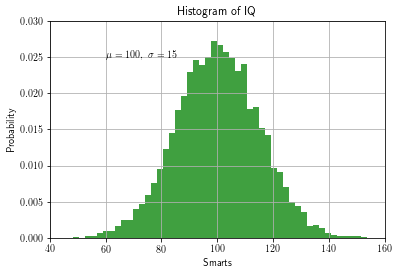

In [0]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

#EJEMPLO matplotlib via la API de PANDAS 

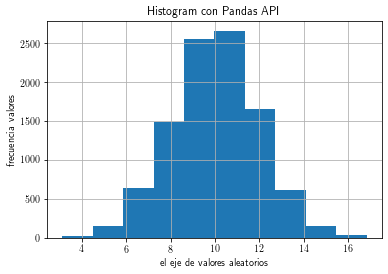

In [0]:
%matplotlib inline 
import random 
import pandas as pd 
dat = [random.gauss(10, 2) for i in range(10000) ] 
df = pd.DataFrame( { 'casa': dat} ) 
myax = df.casa.hist()  # metodo de pandas para un histograma. retorna el AXES
myax.set_title('Histogram con Pandas API', size=12);
myax.set_xlabel('el eje de valores aleatorios')
myax.set_ylabel('frecuencia valores');

#PLOTLY El modulo graficador del futuro : 2 ejemplos

In [0]:


import plotly.graph_objects as go

myx = [i/10 for i in range(-100, 100)]
y1 = [i**2 for i in myx]
y2 = [i**3 for i in myx]
y3 = [i**4 for i in myx]

fig = go.Figure(data=go.Scatter(x=myx, y=y1))
fig.add_trace(go.Scatter(x=myx, y=y2))
fig.add_trace(go.Scatter(x=myx, y=y3))

fig.show()



In [0]:
import plotly.express as px
#px  tiene una base de datos en el submodulo "data"
#gapminder es uno de los datos en el metodo "data".
df = px.data.gapminder()   #dataframe con los datos

fig = px.bar(df,
             x='continent',
             y='gdpPercap',
             color='continent',
             animation_frame='year',
             animation_group='country',
             range_y=[0, 1000000])
fig.show()